In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\tz_a1.csv', encoding = 'windows-1251', sep = ';')

In [3]:
df

,Наименование,Производитель,"Цена за шт, р",Поставщик,"Количество, шт","Брак, шт","Стоимость партии, р","Стоимость брака, р",День поставки,Приемщик
0,Чайник,Tefalka,1350,Смак Компани,32,0,43200,0,11.03.2015,Мирный М.М.
1,Чайник,Philipka,2000,Смак Компани,50,2,100000,4000,18.12.2015,Хороших Х.Х.
2,Чайник,Braunok,1380,Смак Компани,14,1,19320,1380,17.04.2015,Удальцов У.У.
3,Чайник,Moulinexik,1700,Смак Компани,16,2,27200,3400,07.07.2015,Везунчиков В.В.
4,Чайник,Boschik,1650,Смак Компани,30,1,49500,1650,24.02.2015,Душечкина Д.Д.
...,...,...,...,...,...,...,...,...,...,...
316,Весы,Tefalka,1890,Легкость бытия,16,0,30240,0,10.10.2015,Хороших Х.Х.
317,Весы,Tefalka,1850,STD лидер,12,1,22200,1850,03.03.2015,Удальцов У.У.
318,Весы,Philipka,1860,ТД и Компани,10,1,18600,1860,08.05.2015,Мирный М.М.
319,Весы,Philipka,1820,Легкость бытия,5,0,9100,0,17.11.2015,Хороших Х.Х.


In [4]:
ser  = df\
.groupby(['Наименование'], as_index =False)\
.agg({'Брак, шт':'sum', 'Количество, шт':'sum'})

In [5]:
ser

,Наименование,"Брак, шт","Количество, шт"
0,Весы,7,105
1,Кофеварка,35,635
2,Кофемолка,54,841
3,Кухонный комбайн,57,698
4,Миксер,72,988
5,Мясорубка,86,1210
6,Пароварка,78,1037
7,Печь СВЧ,43,797
8,Соковыжималка,90,1430
9,Тостер,48,802


In [6]:
defective_products_all = df['Брак, шт'].sum()

In [7]:
defective_products_all

629

In [8]:
ser['Доля брака к общ. кол-ву брака'] = ser['Брак, шт']/defective_products_all 

In [9]:
ser

,Наименование,"Брак, шт","Количество, шт",Доля брака к общ. кол-ву брака
0,Весы,7,105,0.011129
1,Кофеварка,35,635,0.055644
2,Кофемолка,54,841,0.085851
3,Кухонный комбайн,57,698,0.090620
4,Миксер,72,988,0.114467
5,Мясорубка,86,1210,0.136725
6,Пароварка,78,1037,0.124006
7,Печь СВЧ,43,797,0.068362
8,Соковыжималка,90,1430,0.143084
9,Тостер,48,802,0.076312


In [10]:
ser['Доля брака к кол-ву продуктов'] = ser['Брак, шт']/ser['Количество, шт']

In [11]:
ser

,Наименование,"Брак, шт","Количество, шт",Доля брака к общ. кол-ву брака,Доля брака к кол-ву продуктов
0,Весы,7,105,0.011129,0.066667
1,Кофеварка,35,635,0.055644,0.055118
2,Кофемолка,54,841,0.085851,0.064209
3,Кухонный комбайн,57,698,0.090620,0.081662
4,Миксер,72,988,0.114467,0.072874
5,Мясорубка,86,1210,0.136725,0.071074
6,Пароварка,78,1037,0.124006,0.075217
7,Печь СВЧ,43,797,0.068362,0.053952
8,Соковыжималка,90,1430,0.143084,0.062937
9,Тостер,48,802,0.076312,0.059850


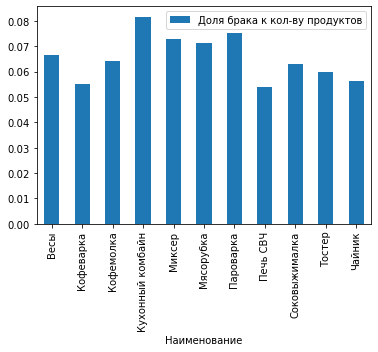

In [12]:
ax = ser.plot.bar(x='Наименование', y='Доля брака к кол-ву продуктов', rot=90)

In [13]:
ser.to_excel("Defective_Products_Report_24.03.21.xlsx", index = False)